# Khám phá dữ liệu

## Import các thư viện cần thiết

In [ ]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # setup đường dẫn

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns 

## Load dữ liệu

In [2]:
input_path = "../data/raw/Global_Landslide_Catalog_Export.csv"
df = pd.read_csv(input_path)

## Tổng quan về tập dữ liệu

### Thông tin cơ bản

In [3]:
df.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [4]:
df.tail()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,11109,04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,10845,03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,10973,12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,10901,04/29/2017 07:03:00 PM,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,NaN,NaN,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395
11032,The Times of India,https://timesofindia.indiatimes.com/city/hyder...,10949,03/13/2017 02:32:00 PM,NaN,Kondapur Commercial Complex Construction Mudslide,A mudslide at an under-construction commercial...,"Hyderabad, Rangareddy, Telangana",1km,mudslide,...,NaN,NaN,NaN,NaN,NaN,10/05/2017 02:32:00 PM,12/08/2017 07:57:00 PM,02/15/2018 03:51:00 PM,78.356505,17.465630


#### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])

Số dòng: 11033
Số cột: 31


#### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
Mỗi dòng ứng với một sự kiện sạt lở đất. Các dòng đều có ý nghĩa giống nhau.

#### Kích thước tổng thể của tập dữ liệu là bao nhiêu?

In [6]:
total_usage_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)

print(f"Dung lượng bộ nhớ: {total_usage_mb:.2f} MB")

Dung lượng bộ nhớ: 19.74 MB


### Tính Toàn vẹn Dữ liệu

#### Có các dòng bị trùng lặp không? Nếu có, số lượng là bao nhiêu?

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.duplicated('event_id').sum()

np.int64(0)

-> Không có dòng nào bị trùng lặp, trùng event_id

#### Có cần phải xóa các dòng bị trùng không?

-> Do không có dòng nào bị trùng lặp nên không cần phải xóa

#### Tất cả các dòng đã đầy đủ thông tin chưa, hay một số dòng hoàn toàn trống?

In [9]:
rows_completely_empty = df.isna().all(axis=1)
count_empty = rows_completely_empty.sum()
print(f"Số hàng hoàn toàn trống: {count_empty}")

# Xem các dòng đó (nếu có)
if count_empty:
    df[rows_completely_empty]

Số hàng hoàn toàn trống: 0


### Danh mục cột

#### Ý nghĩa/định nghĩa của từng cột là gì?

| Tên thuộc tính (Feature) | Ý nghĩa/định nghĩa |
| :--- | :--- |
| **source_name** | Tên của nguồn tin báo cáo về sự kiện sạt lở |
| **source_link** | Đường dẫn (Link) đến nguồn gốc của báo cáo |
| **event_id** | Mã định danh duy nhất cho sự kiện sạt lở |
| **event_date** | Ngày xảy ra sự kiện sạt lở |
| **event_time** | Giờ xảy ra sự kiện (lưu ý: trường này có thể thiếu nhiều giá trị) |
| **event_title** | Tiêu đề hoặc tên gọi của sự kiện sạt lở |
| **event_description** | Mô tả chi tiết về sự kiện sạt lở |
| **location_description** | Mô tả về địa điểm nơi xảy ra sạt lở |
| **location_accuracy** | Độ chính xác của dữ liệu vị trí địa lý |
| **landslide_category** | Phân loại sạt lở (ví dụ: landslide, mudslide...) |
| **landslide_size** | Kích thước/quy mô của vụ sạt lở |
| **landslide_trigger** | Nguyên nhân kích hoạt vụ sạt lở (ví dụ: monsoon, rain, downpour,...) |
| **landslide_setting** | Bối cảnh địa lý/môi trường xảy ra |
| **fatality_count** | Số lượng người tử vong do sạt lở |
| **injury_count** | Số lượng người bị thương do sạt lở |
| **storm_name** | Tên cơn bão (nếu vụ sạt lở do bão gây ra) |
| **photo_link** | Đường dẫn đến hình ảnh minh họa vụ sạt lở |
| **notes** | Các ghi chú hoặc nhận xét bổ sung về sự kiện |
| **event_import_source** | Nguồn gốc nơi dữ liệu sự kiện được nhập vào hệ thống |
| **event_import_id** | Mã ID của sự kiện từ nguồn nhập liệu |
| **country_name** | Tên quốc gia nơi xảy ra sạt lở |
| **country_code** | Mã quốc gia |
| **admin_division_name** | Tên đơn vị hành chính (ví dụ: tên Tỉnh hoặc Bang) nơi xảy ra sạt lở |
| **admin_division_population** | Dân số của đơn vị hành chính đó |
| **gazeteer_closest_point** | Tên địa danh hoặc điểm mốc địa lý gần nhất với vị trí sạt lở |
| **gazeteer_distance** | Khoảng cách từ vị trí sạt lở đến điểm mốc địa lý gần nhất |
| **submitted_date** | Ngày sự kiện được gửi vào danh mục dữ liệu |
| **created_date** | Ngày sự kiện được tạo trong danh mục dữ liệu |
| **last_edited_date** | Ngày dữ liệu về sự kiện được chỉnh sửa lần cuối |
| **longitude** | Kinh độ của vị trí sạt lở |
| **latitude** | Vĩ độ của vị trí sạt lở |

#### Có cột nào nên được loại bỏ không? Tại sao?

In [10]:
# Xác định số lượng giá trị thiếu và tỷ lệ của các feature
df_cols = pd.DataFrame({'Count Missing': df.isna().sum(),
                        'Percent Missing': df.isnull().sum()*100/df.shape[0]})

df_cols = df_cols[df_cols['Percent Missing'] > 80]

print("Các cột thiếu hơn 80% dữ liệu")
df_cols

Các cột thiếu hơn 80% dữ liệu


,Count Missing,Percent Missing
event_time,11033,100.000000
storm_name,10456,94.770235
photo_link,9537,86.440678
notes,10716,97.126801


Nhóm quyết định loại bỏ các cột sau khỏi bộ dữ liệu để tập trung vào việc phân tích các yếu tố ảnh hưởng đến sạt lở:
- Loại bỏ Metadata hệ thống: Các cột như `event_import_id, event_import_source, submitted_date, created_date, last_edited_date` được loại bỏ vì chúng chỉ phản ánh quy trình nhập liệu hành chính, không mang thông tin về đặc điểm vật lý của sự kiện sạt lở.
- Loại bỏ thông tin dư thừa: Cột `country_code` bị loại bỏ vì đã có `country_name`.
- Loại bỏ dữ liệu không cấu trúc: Các cột `source_link và photo_link` được loại bỏ vì chúng là các đường dẫn web, không phục vụ cho việc phân tích thống kê định lượng.
- Các cột có dữ liệu thiếu quá nhiều (dựa vào phân tích phía trên): Các cột `event_time, storm_name, notes` đều có **Percent Missing** > 80%.

#### Những cột nào có liên quan đến việc phân tích tiềm năng?

Theo như ý nghĩa/định nghĩa của từng cột, dữ liệu có trong các cột và đã xác định các cột cần loại bỏ thì nhóm có tổng hợp lại danh sách các cột có ý nghĩa phân tích cao của dataset như sau:
1. Phân tích mức độ thiệt hại về người
- `fatality_count`: Số người tử vong. Dùng để phân tích mức độ nguy hiểm chết người.
- `injury_count`: Số người bị thương. Dùng để đánh giá tác động sức khỏe cộng đồng.
2. Phân tích đặc điểm vụ sạt lở
- `landslide_category`: Giúp phân loại đặc tính rủi ro của từng vùng địa hình.
- `landslide_trigger`: Tìm mối tương quan giữa nguyên nhân và số lượng thương vong
- `landslide_size`: Dùng để phân tích tương quan giữa quy mô vật lý và thiệt hại con người.
- `landslide_setting`: Kiểm tra khu vực nào dễ bị sạt lở
3. Phân tích không gian – địa lý
- `latitude và longitude`: Hai biến số quan trọng nhất để trực quan hóa dữ liệu trên bản đồ (Heatmap) và phân tích cụm địa lý.
- `country_name và admin_division_name`: Dùng để so sánh tần suất và mức độ thiệt hại giữa các quốc gia hoặc các vùng lãnh thổ (Tỉnh/Bang).
- `admin_division_population`: Liên hệ dân số với mức độ thiệt hại
4. Phân tích thời gian
- `event_date`: Có thể phân tích nhằm xác định "mùa sạt lở" trong năm, hoặc xu hướng tăng giảm số vụ sạt lở qua các năm.

Những cột ít quan trọng nhưng vẫn hữu ích cần xử lý NLP: `location_description và event_description`

### Kiểu Dữ liệu

#### Kiểu dữ liệu hiện tại của từng cột là gì?

In [11]:
df.dtypes

source_name                   object
source_link                   object
event_id                       int64
event_date                    object
event_time                   float64
event_title                   object
event_description             object
location_description          object
location_accuracy             object
landslide_category            object
landslide_trigger             object
landslide_size                object
landslide_setting             object
fatality_count               float64
injury_count                 float64
storm_name                    object
photo_link                    object
notes                         object
event_import_source           object
event_import_id              float64
country_name                  object
country_code                  object
admin_division_name           object
admin_division_population    float64
gazeteer_closest_point        object
gazeteer_distance            float64
submitted_date                object
c

#### Có cột nào mang kiểu dữ liệu không phù hợp không? Những cột nào cần thực hiện chuyển đổi kiểu dữ liệu?

Các cột có kiểu dữ liệu không phù hợp là:
- `event_date, submitted_date, created_date, last_edited_date` đang ở kiểu dữ liệu object cần chuyển sang kiểu dữ liệu datatime.
- `event_id, event_import_id` đang ở kiểu dữ liệu int64 cần chuyển sang kiểu dữ liệu object hoặc khi xét cột số thì loại bỏ các cột này ra.

## Phân tích Cột Số
Trước khi phân tích các cột số thì nhóm sẽ xử lý nhẹ kiểu dữ liệu của các cột chưa phù hợp, và xóa các cột không cần thiết

In [12]:
# Thực hiện loại bỏ các cột không cần thiết
cols_to_drop = [
    'event_import_id', 'event_import_source', 
    'created_date', 'submitted_date', 'last_edited_date',
    'source_link', 'photo_link', 'storm_name',
    'country_code', 'event_time', 'notes',
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Xử lý cột Thời gian (Chuyển từ object sang datetime)
df['event_date'] = pd.to_datetime(df['event_date'], format='mixed', dayfirst=False, errors='coerce')

Dataset có các cột số là: `fatality_count, injury_count, admin_division_population, gazeteer_distance`

### Phân phối và Xu hướng tập trung

#### Hình dạng phân phối như thế nào? Vẽ biểu đồ trực quan.

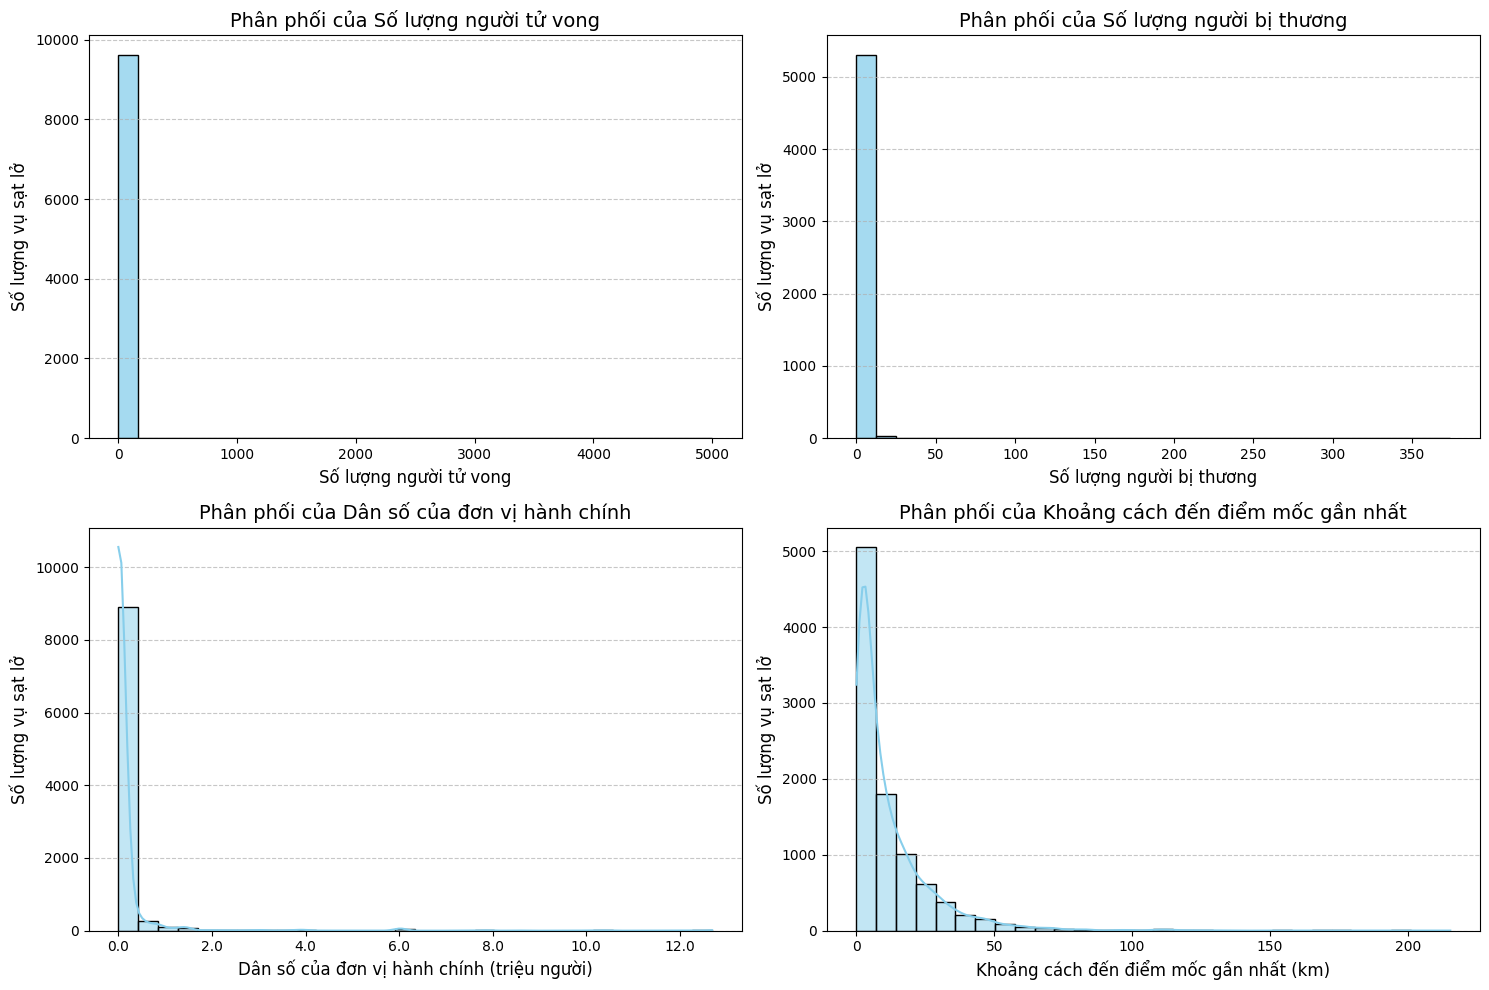

In [13]:
# Hàm format tick: chia 1.000.000 để chuyển sang đơn vị triệu
def millions(x, pos):
    return '{:,.1f}'.format(x / 1_000_000)

# Danh sách các cột cần vẽ
cols_to_plot = {
    'fatality_count': 'Số lượng người tử vong', 
    'injury_count': 'Số lượng người bị thương', 
    'admin_division_population' : 'Dân số của đơn vị hành chính', 
    'gazeteer_distance' : 'Khoảng cách đến điểm mốc gần nhất'
}

n_cols = 2
n_rows = 2

plt.figure(figsize=(15, 5 * n_rows))

for i, (col, col_name) in enumerate(cols_to_plot.items()):
    # Tạo vị trí cho từng biểu đồ
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    if col == 'gazeteer_distance':
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black', ax=ax)
        plt.xlabel(col_name + ' (km)', fontsize=12)
    elif col == 'admin_division_population':
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black', ax=ax)
        ax.xaxis.set_major_formatter(FuncFormatter(millions))
        plt.xlabel(col_name + ' (triệu người)', fontsize=12)
    else:
        sns.histplot(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', ax=ax)
        plt.xlabel(col_name, fontsize=12)
    # Trang trí
    plt.title(f'Phân phối của {col_name}', fontsize=14)
    plt.ylabel('Số lượng vụ sạt lở', fontsize=12)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Thống kê mô tả

In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
cols_to_analyze = ['fatality_count', 'injury_count', 'admin_division_population', 'gazeteer_distance']
print("--- THỐNG KÊ MÔ TẢ CƠ BẢN ---")
df[cols_to_analyze].describe()

--- THỐNG KÊ MÔ TẢ CƠ BẢN ---


,fatality_count,injury_count,admin_division_population,gazeteer_distance
count,9648.00,5359.00,9471.00,9471.00
mean,3.22,0.75,157760.05,11.87
std,59.89,8.46,829734.54,15.60
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,1963.00,2.36
50%,0.00,0.00,7365.00,6.25
75%,1.00,0.00,34021.00,15.82
max,5000.00,374.00,12691836.00,215.45


**Nhận xét:**
1. Về số lượng người tử vong (fatality_count):
- Trung bình là 3.22 lớn hơn trung vị là 0.00, nên phân phối có xu hướng lệch phải
- 

### Giá trị ngoại lai

### 

## Phân tích các cột phân loại
Xét các cột phân loại sau: `location_accuracy, landslide_category, landslide_trigger, landslide_size, landslide_setting, country_name`                    

### Phân phối giá trị

#### Các cột phân loại có bao nhiêu giá trị duy nhất?

In [15]:
cols_category = ['location_accuracy', 'landslide_category', 'landslide_trigger', 'landslide_size', 'landslide_setting', 'country_name']
for col in cols_category:
    print(f"\nSố lượng giá trị duy nhất của cột \"{col}\": {df[col].nunique()}")
    print(f"Mảng các giá trị duy nhất: {df[col].unique()}")


Số lượng giá trị duy nhất của cột "location_accuracy": 9
Mảng các giá trị duy nhất: ['unknown' '5km' '10km' '25km' 'exact' '1km' '50km' nan '250km' '100km']

Số lượng giá trị duy nhất của cột "landslide_category": 14
Mảng các giá trị duy nhất: ['landslide' 'mudslide' 'complex' 'rock_fall' 'debris_flow'
 'riverbank_collapse' 'other' 'unknown' 'lahar' 'snow_avalanche' 'creep'
 'earth_flow' 'translational_slide' nan 'topple']

Số lượng giá trị duy nhất của cột "landslide_trigger": 18
Mảng các giá trị duy nhất: ['rain' 'downpour' 'monsoon' 'tropical_cyclone' 'unknown'
 'continuous_rain' 'dam_embankment_collapse' 'no_apparent_trigger' nan
 'other' 'leaking_pipe' 'construction' 'snowfall_snowmelt' 'mining'
 'flooding' 'earthquake' 'freeze_thaw' 'volcano' 'vibration']

Số lượng giá trị duy nhất của cột "landslide_size": 6
Mảng các giá trị duy nhất: ['large' 'small' 'medium' 'unknown' 'very_large' nan 'catastrophic']

Số lượng giá trị duy nhất của cột "landslide_setting": 14
Mảng các giá trị 

#### Biểu đồ trực quan các cột

C:\Users\maidi\AppData\Local\Temp\ipykernel_23116\1429335962.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(category_labels_display)


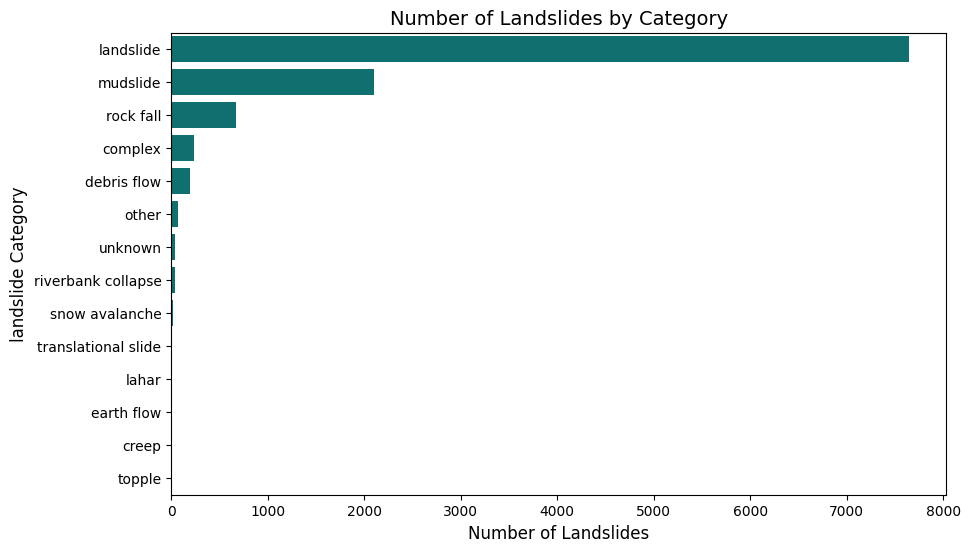

In [16]:
# --- 1. landslide_category ---
plt.figure(figsize=(10, 6))

category_labels_display = [val.replace('_',' ') for val in df.landslide_category.value_counts().index]

ax = sns.countplot(
    y='landslide_category',
    data=df,
    order=df['landslide_category'].value_counts().index,
    color='teal'
)
plt.title('Number of Landslides by Category', fontsize=14)
plt.xlabel('Number of Landslides', fontsize=12)
plt.ylabel('landslide Category', fontsize=12)
ax.set_yticklabels(category_labels_display)

plt.show()

**Nhận xét:**
- Nhóm sạt lở (landslide) chiếm số lượng lớn khoảng 7600 vụ. Chứng tỏ trong quá trình thu thập dữ liệu, người ghi nhận thường sử dụng thuật ngữ "sạt lở" thay vì phân loại chi tiết ra.
- Nhóm chiếm số lượng vụ đứng thứ 2 là lũ bùn (mudslide).
- Các nhóm còn lại có số lượng vụ rất ít.

C:\Users\maidi\AppData\Local\Temp\ipykernel_23116\1027427486.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(trigger_labels_display)


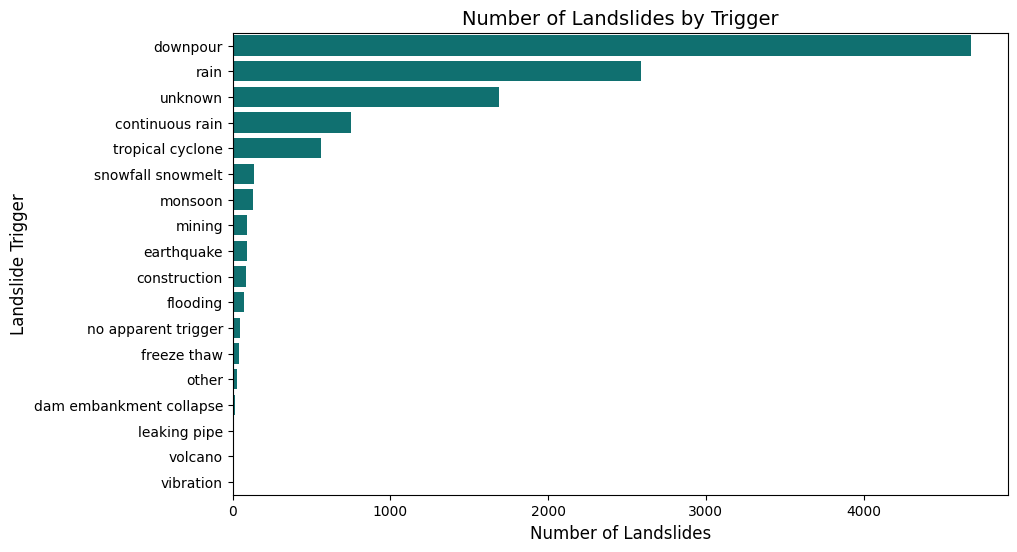

In [17]:
# --- 2. landslide_trigger ---
plt.figure(figsize=(10, 6))

trigger_labels_display = [val.replace('_',' ') for val in df.landslide_trigger.value_counts().index]

ax = sns.countplot(
    y='landslide_trigger',
    data=df,
    order=df['landslide_trigger'].value_counts().index,
    color='teal'
)
plt.title('Number of Landslides by Trigger', fontsize=14)
plt.xlabel('Number of Landslides', fontsize=12)
plt.ylabel('Landslide Trigger', fontsize=12)
ax.set_yticklabels(trigger_labels_display)

plt.show()

**Nhận xét:**
- Mưa là nguyên nhân chính, các yếu tố liên quan đến nước và thời tiết là nguyên nhân áp đảo gây ra sạt lở như mưa lớn (downpour) khoảng hơn 4500 vụ, mưa thường (rain) khoảng 2500 vụ, mưa liên tục (continuous rain), bão nhiệt đới (tropical cyclone), gió mùa (monsoon), lũ lụt (flooding).
- Nhóm không xác định (unknown) cũng có số lượng rất cao gần 1700 vụ.
- Các nguyên nhân do con người như khai khoáng (mining), xây dựng (construction), vỡ đường ống nước (leaking pipe) có số lượng vụ không nhiều.
- Các nguyên nhân do địa chấn như động đất (earthquake), rung chấn (vibration), núi lửa (volcano) cũng có số lượng rất ít.
- Các nguyên nhân hiếm gặp như tuyết tan (snowfall snowmelt), đóng băng (freeze thaw).

C:\Users\maidi\AppData\Local\Temp\ipykernel_23116\1766493000.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(setting_labels_display)


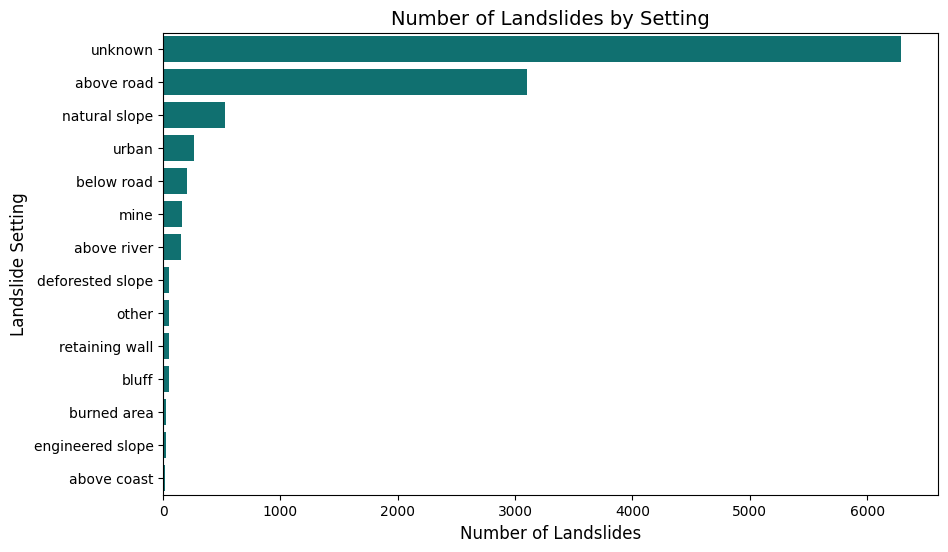

In [18]:
# --- 3. landslide_setting ---
plt.figure(figsize=(10, 6))

setting_labels_display = [val.replace('_',' ') for val in df.landslide_setting.value_counts().index]

ax = sns.countplot(
    y='landslide_setting',
    data=df,
    order=df['landslide_setting'].value_counts().index,
    color='teal'
)
plt.title('Number of Landslides by Setting', fontsize=14)
plt.xlabel('Number of Landslides', fontsize=12)
plt.ylabel('Landslide Setting', fontsize=12)
ax.set_yticklabels(setting_labels_display)

plt.show()

**Nhận xét:**
- Nhóm không xác định (unknown) chiếm số lượng lớn với hơn 6000 vụ. Chứng tỏ có hơn một nửa số vụ sạt lở không được ghi nhận về bối cảnh môi trường xung quanh.
- Nếu bỏ qua nhóm không xác định thì bối cảnh có số vụ lớn nhất là trên đường (above road) với hơn 3000 vụ.Chứng tỏ xây dựng đường xá là một trong những yếu tố rủi ro lớn nhất dẫn đến sạt lở.
- Các bối cảnh như khu vực bị cháy rừng (burned area), sườn dốc đã được gia cố kỹ thuật (engineered slope), ven biển (above coast) có số lượng vụ được ghi nhận rất ít.

C:\Users\maidi\AppData\Local\Temp\ipykernel_23116\1013013436.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(accuracy_labels_display)
C:\Users\maidi\AppData\Local\Temp\ipykernel_23116\1013013436.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(size_labels_display)


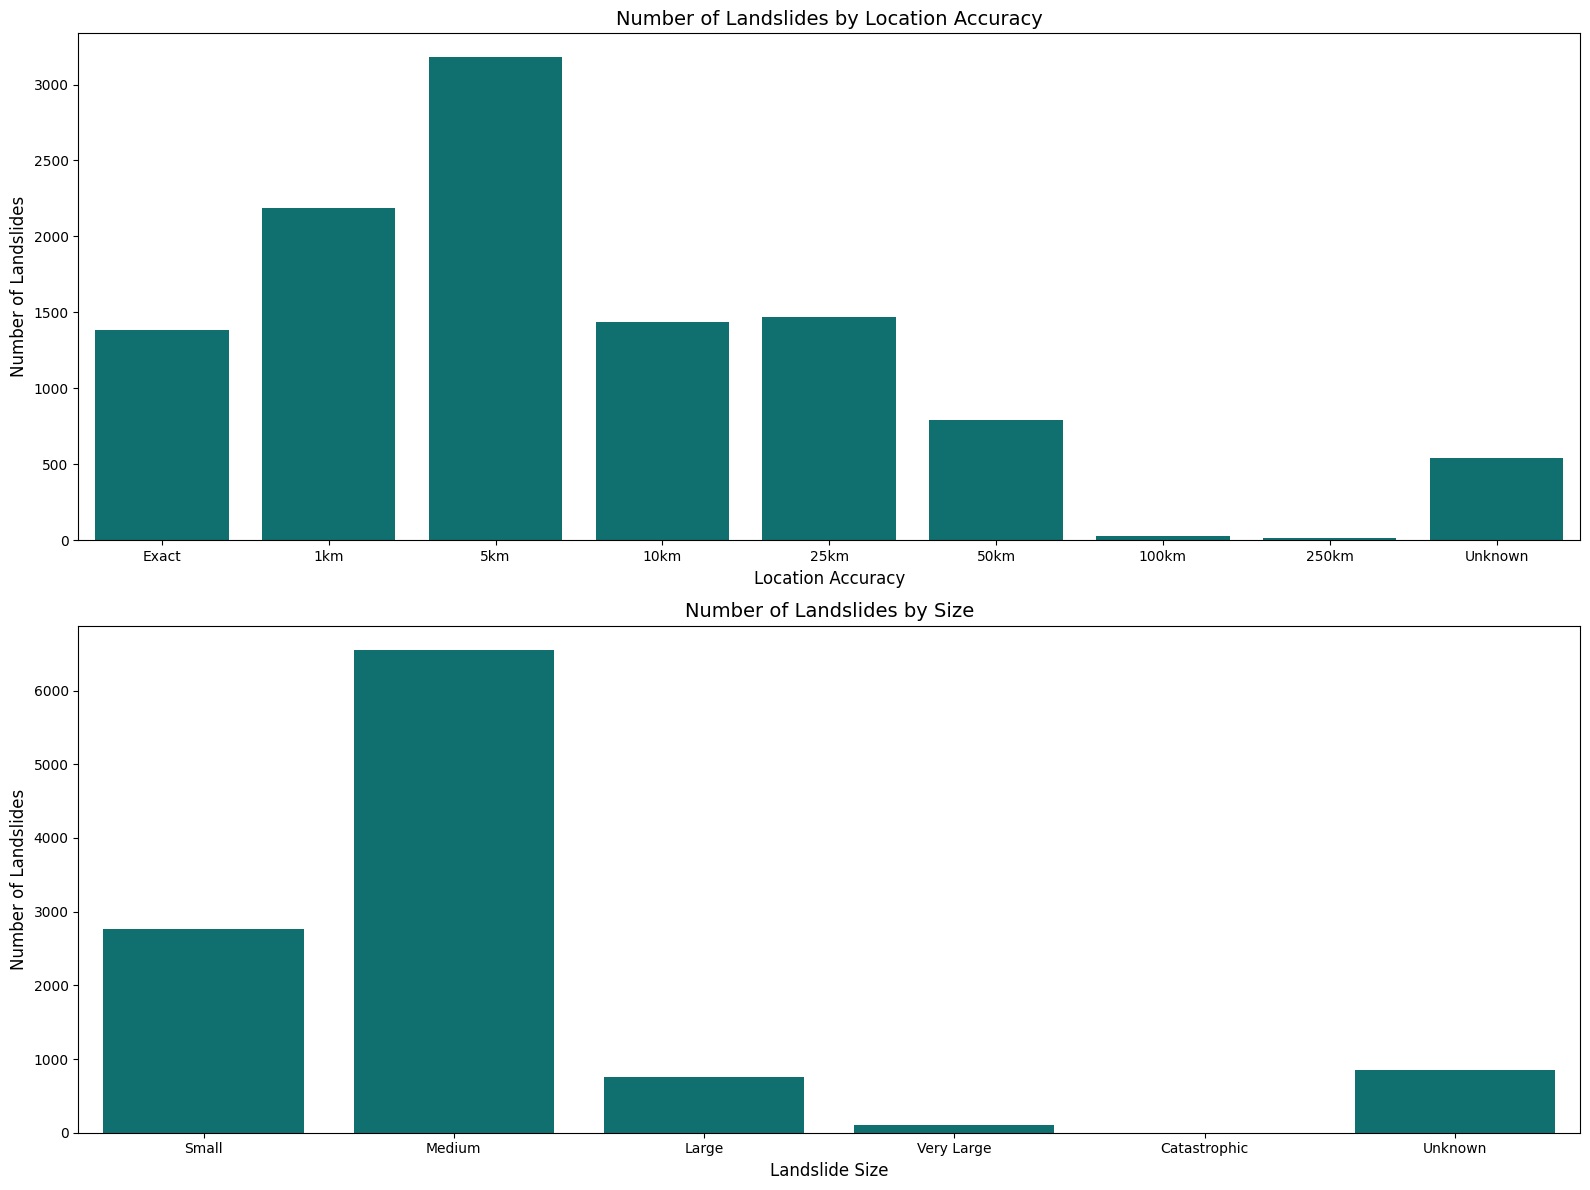

In [19]:
accuracy_order = [
    'exact', '1km', '5km', '10km', '25km', 
    '50km', '100km', '250km', 'unknown'
]

size_order = [
    'small', 'medium', 'large', 'very_large', 
    'catastrophic', 'unknown'
]

# Dùng để hiển thị trên trục hoành
accuracy_labels_display = [
    'Exact', '1km', '5km', '10km', '25km', 
    '50km', '100km', '250km', 'Unknown'
]

size_labels_display = [
    'Small', 'Medium', 'Large', 'Very Large', 
    'Catastrophic', 'Unknown'
]

# Thiết lập biểu đồ
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# --- 4. location_accuracy ---
sns.countplot(
    ax=axes[0],
    x='location_accuracy',
    data=df,
    order=accuracy_order, 
    color='teal'
)
axes[0].set_title('Number of Landslides by Location Accuracy', fontsize=14)
axes[0].set_xlabel('Location Accuracy', fontsize=12)
axes[0].set_ylabel('Number of Landslides', fontsize=12)
axes[0].set_xticklabels(accuracy_labels_display)

# --- 5. landslide_size ---
sns.countplot(
    ax=axes[1],
    x='landslide_size',
    data=df,
    order=size_order, 
    color='teal'
)
axes[1].set_title('Number of Landslides by Size', fontsize=14)
axes[1].set_xlabel('Landslide Size', fontsize=12)
axes[1].set_ylabel('Number of Landslides', fontsize=12)
axes[1].set_xticklabels(size_labels_display)

plt.tight_layout()
plt.show()

**Nhận xét:**
1. Biểu đồ "Number of Landslides by Location Accuracy":
- Phần lớn các vụ sạt lở được ghi nhận với độ chính xác vị trí tương đối tốt. Nhóm 5km chiếm số lượng cao nhất (hơn 3000 vụ), tiếp theo là nhóm 1km (hơn 2000 vụ).
- Số lượng vụ sạt lở có xu hướng giảm dần khi độ chính xác tăng lên (từ 10km đến 250km).
- Số lượng vụ sạt lở có độ chính xác (exact) là khá đáng kể (khoảng 1400 vụ). Tuy nhiên, vẫn có một lượng đáng kể các vụ sạt lở mà độ chính xác vị trí là không xác định (unknown).

2. Biểu đồ "Number of Landslides by Size"
- Nhóm trung bình (medium) chiếm số lượng vượt trội với hơn 6500 vụ sạt lở.
- Nhóm nhỏ (small) là nhóm phổ bine61 thứ 2 với gần 3000 vụ sạt lở.
- Số lượng vụ sạt lở có quy mô lớn (large), rất lớn (very large) và thảm họa (catastrophic) là rất ít, đặc biệt là nhóm thảm họa. Điều này phản ánh thực tế rằng các sự kiện sạt lở quy mô cực lớn thường hiếm khi xảy ra.
- Nhóm không xác định (unknown) có khoảng 850 vụ, cho thấy vẫn còn nhiều vụ chưa xác định rõ quy mô.

Insight: Theo quy luật tự nhiên, sạt lở nhỏ thường xảy ra nhiều hơn sạt lở lớn. Việc nhóm "Small" thấp hơn nhóm "Medium" gợi ý rằng có thể có "thiên kiến báo cáo" (Reporting Bias) – tức là các vụ sạt lở quá nhỏ thường bị bỏ qua không được ghi nhận vào hệ thống.

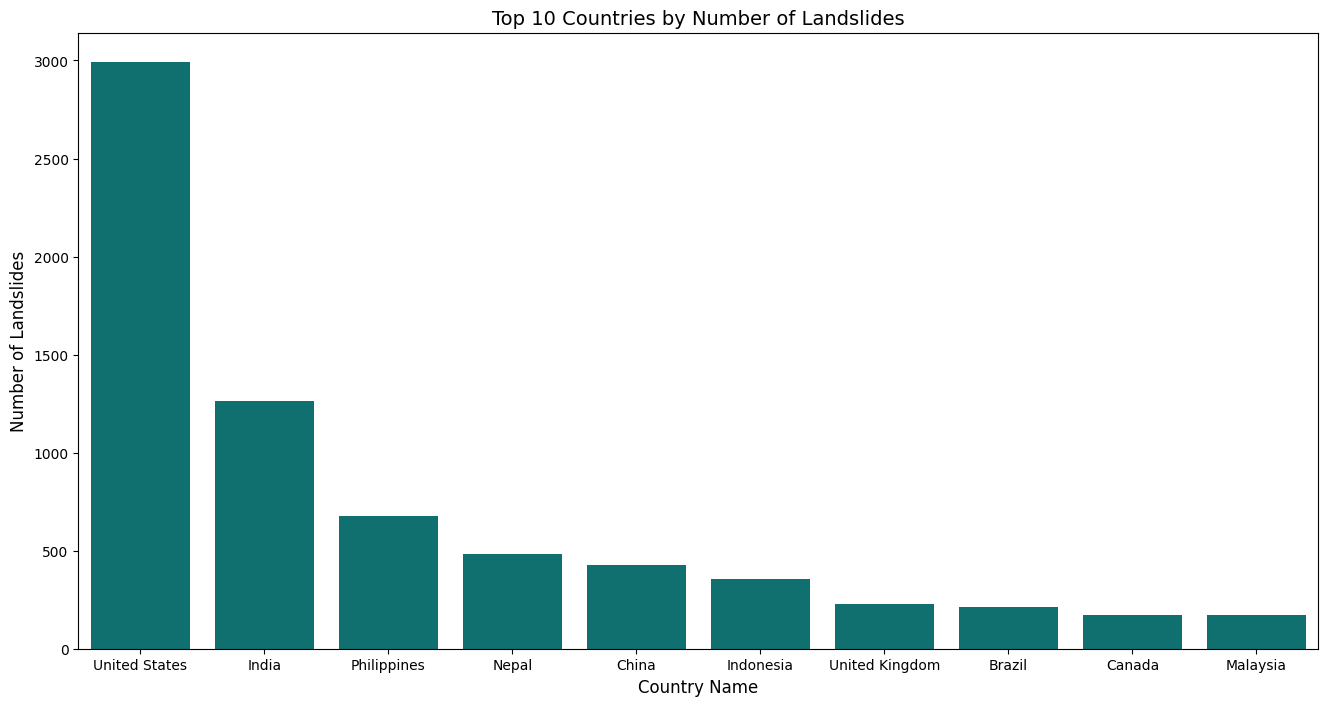

In [20]:
# --- 6. country_name ---
plt.figure(figsize=(16, 8))

sns.countplot(
    x='country_name',
    data=df,
    order=df['country_name'].value_counts().head(10).index,
    color='teal'
)
plt.title('Top 10 Countries by Number of Landslides', fontsize=14)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Number of Landslides', fontsize=12)


plt.show()

**Nhận xét:**
- Mỹ là quốc gia có số lượng báo cáo sạt lở cao nhất trong tập dữ liệu (với gần 3000 vụ), trong khi đó Canada và Malaysia ghi nhận khoảng 175 vụ. Về mặt địa chất, Mỹ không hẳn là nơi xảy ra sạt lở nhiều nhất thế giới, đây là dấu hiệu điển hình của Reporting Bias vì NASA có khả năng tiếp cận và ghi nhận các báo cáo từ Mỹ sẽ tốt hơn các quốc gia khác.
- Trong 10 quốc gia thì đa số thuộc Châu Á; còn lại thuộc Bắc Mỹ (United States, Canada), Nam Mỹ (Brazil), Châu Âu (United Kingdom).

#### Sự phân phối có cân bằng hay bị mất cân bằng nghiêm trọng?
-> Các biểu đồ của các cột phân loại đều có phân phối bị mất cân bằng

### Chất lượng dữ liệu

#### Tỷ lệ phần trăm giá trị bị thiếu của các cột phân loại

In [21]:
print("Tỷ lệ phần trăm giá trị thiếu của các cột là:")
percent_missing = df[cols_category].isnull().mean().sort_values(ascending=False) * 100
percent_missing = percent_missing.apply(lambda x: f"{x:.2f}%")
print(percent_missing)

Tỷ lệ phần trăm giá trị thiếu của các cột là:
country_name          14.16%
landslide_setting      0.63%
landslide_trigger      0.21%
landslide_size         0.08%
location_accuracy      0.02%
landslide_category     0.01%
dtype: object


**Nhận xét:** Các cột phân loại đa số thiếu dữ liệu rất ít, có cột country_name là thiếu 14.16% nhưng cũng không quá cao.

#### Có sự không nhất quán trong các danh mục không? Có các giá trị bất ngờ hoặc bất thường không? 

- Tất cả các cột đều chứa giá trị nan, nên thay thế nan bằng unknown để đồng nhất với các giá trị hiện có.
- Đánh giá từng cột:
    + Cột `location_accuracy`: có tính nhất quán khá tốt, không có giá trị bất thường.
    + Cột `landslide_category`: có sự chồng chéo về ngữ nghĩa, "landslide" là thuật ngữ chung, trong khi "mudslide", "rock_fall" là thuật ngữ cụ thể.
    + Cột `landslide_trigger`: Có quá nhiều danh mục chồng chéo liên quan đến "MƯA".
    + Cột `landslide_size`: có tính nhất quán tốt.
    + Cột `landslide_setting`: có tính nhất quán tương đối ổn.
    + Cột `country_name`: có sự không nhất quán và trùng lặp. Trùng lặp tên "Czechia" và "Czech Republic" là một quốc gia, định dạng lạ "Myanmar [Burma]", dữ liệu chứa cả quốc gia độc lập (United States, China) lẫn vùng lãnh thổ phụ thuộc (Hong Kong, U.S. Virgin Islands, Puerto Rico, Guam, American Samoa).

#### Có các danh mục có rất ít quan sát không? Chúng có nên được gộp nhóm lại không?

- Cột `location_accuracy`: Các giá trị như 100km, 250km có số lượng quan sát rất ít. Có thể gộp 50km, 100km, 250km thành nhóm ">50km".
- Cột `landslide_category`: Các nhóm như lahar, topple, creep, earth_flow, translational_slide, snow_avalanche có số lượng quan sát rất ít. Có thể gộp tất cả các nhóm trên và nhóm unknown vào nhóm other.
- Cột `landslide_trigger`: 
    + Gộp rain, downpour, continuous_rain, flooding, monsoon, tropical_cyclone thành một nhóm lớn là "rain". 
    + Gộp construction, mining, leaking_pipe, dam_embankment_collapse thành một nhóm "anthropogenic".
    + Gộp earthquake, volcano, vibration thành một nhóm "Seismic".
    + Gộp unknown, no_apparent_trigger, snowfall_snowmelt, freeze_thaw thành "other". 
- Cột `landslide_size`: nhóm catastrophic quá nhỏ, có thể gộp vào very_large.
- Cột `landslide_setting`: Có thể gộp above_road và below_road thành "road", gộp các nhóm nhỏ (burned_area, bluff, retaining_wall, above_coast) vào "other".
- Cột `country_name`: Không cần phải gộp.

## Phân tích các cột tọa độ
Xét 2 cột `longitude, latitude`

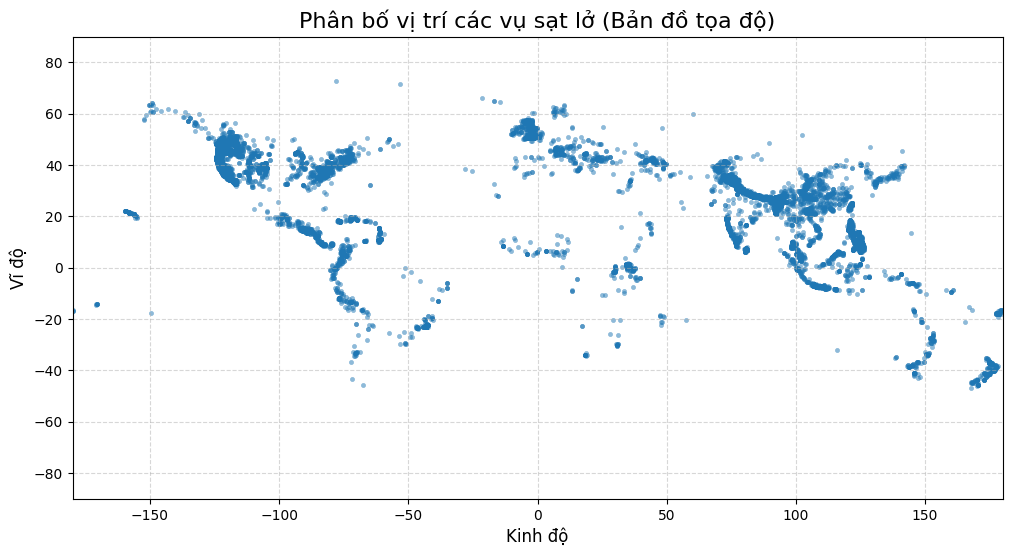

In [22]:
plt.figure(figsize=(12, 6))

# Vẽ Scatter Plot: X là Kinh độ, Y là Vĩ độ
# hue='landslide_category': Tô màu theo loại sạt lở (tùy chọn)
sns.scatterplot(
    data=df, 
    x='longitude', 
    y='latitude', 
    alpha=0.5,       
    s=10,            
    edgecolor=None  
)

plt.title('Phân bố vị trí các vụ sạt lở (Bản đồ tọa độ)', fontsize=16)
plt.xlabel('Kinh độ', fontsize=12)
plt.ylabel('Vĩ độ', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Giới hạn trục để loại bỏ các điểm nhiễu (nếu có)
plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.show()

In [23]:
print(f"Vĩ độ: min = {df.latitude.min():.2f}, max = {df.latitude.max():.2f}")
print(f"Kinh độ: min = {df.longitude.min():.2f}, max = {df.longitude.max():.2f}")

Vĩ độ: min = -46.77, max = 72.63
Kinh độ: min = -179.98, max = 179.99


**Nhận xét:**
- Các vụ sạt lở có phạm vi hầu hết các Châu lục trên thế giới
- Châu Á và Bắc Mỹ có số vụ sạt lở dày đặt hơn các Châu lục còn lại

## Phân tích cột thời gian
Xét cột `event_date`

In [24]:
df_time = pd.DataFrame()

df_time['year'] = df['event_date'].dt.year
df_time['month'] = df['event_date'].dt.month
df_time['day'] = df['event_date'].dt.day
df_time['hour'] = df['event_date'].dt.hour
df_time['weekday'] = df['event_date'].dt.dayofweek    # 0 = Monday
df_time['week'] = df['event_date'].dt.isocalendar().week.astype(int)

df_time.head()

,year,month,day,hour,weekday,week
0,2008,8,1,0,4,31
1,2009,1,2,2,4,1
2,2007,1,19,0,4,3
3,2009,7,31,0,4,31
4,2010,10,16,12,5,41


In [25]:
df_time.dtypes

year       int32
month      int32
day        int32
hour       int32
weekday    int32
week       int64
dtype: object

In [26]:
df_time.shape

(11033, 6)

C:\Users\maidi\AppData\Local\Temp\ipykernel_23116\3280882070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_time, x='year', ax=axes[0, 0], palette='viridis')
C:\Users\maidi\AppData\Local\Temp\ipykernel_23116\3280882070.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_time, x='month', ax=axes[0, 1], palette='magma')
C:\Users\maidi\AppData\Local\Temp\ipykernel_23116\3280882070.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_viz, x='weekday_name', ax=axes[1, 1], order=['Mon','Tue','Wed','Thu','Fri','S

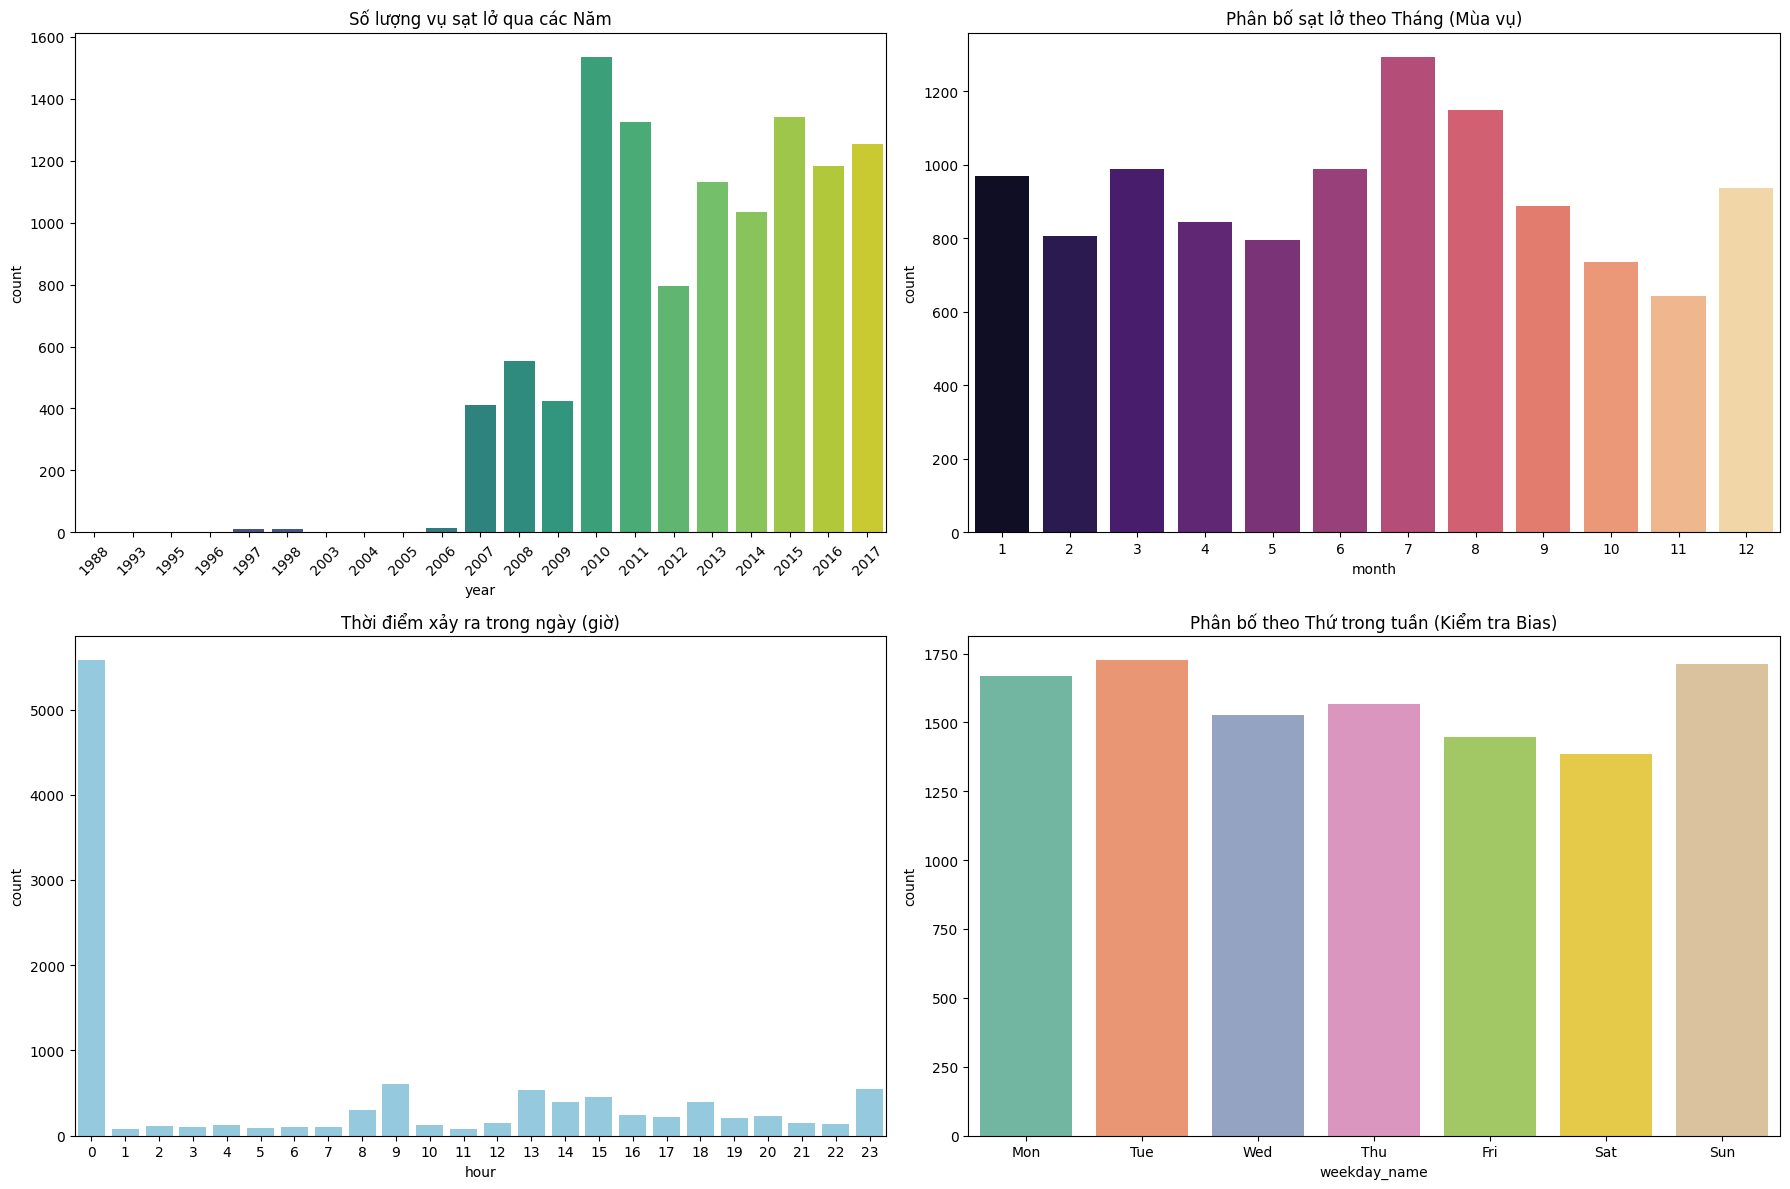

In [27]:
# Thiết lập kích thước
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Xu hướng theo Năm (Year Trend)
sns.countplot(data=df_time, x='year', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Số lượng vụ sạt lở qua các Năm')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Tính mùa vụ theo Tháng (Seasonality)
sns.countplot(data=df_time, x='month', ax=axes[0, 1], palette='magma')
axes[0, 1].set_title('Phân bố sạt lở theo Tháng (Mùa vụ)')

# 3. Phân bố theo Giờ (Hourly)
sns.countplot(data=df_time, x='hour', ax=axes[1, 0], color='skyblue', order=range(0,24))
axes[1, 0].set_title('Thời điểm xảy ra trong ngày (giờ)')

# 4. Kiểm tra thiên kiến ngày trong tuần (Weekday Bias)
# Map 0->Mon, 6->Sun cho dễ nhìn
weekday_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df_viz = df_time.copy()
df_viz['weekday_name'] = df_viz['weekday'].map(weekday_map)
sns.countplot(data=df_viz, x='weekday_name', ax=axes[1, 1], order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], palette='Set2')
axes[1, 1].set_title('Phân bố theo Thứ trong tuần (Kiểm tra Bias)')

plt.tight_layout()
plt.show()

## Phân tích các cột chứa văn bản dài
Xét 2 cột `event_description, location_description`


==================== KHÁM PHÁ CỘT: event_description ====================
-> Số lượng dòng có dữ liệu để phân tích: 10171


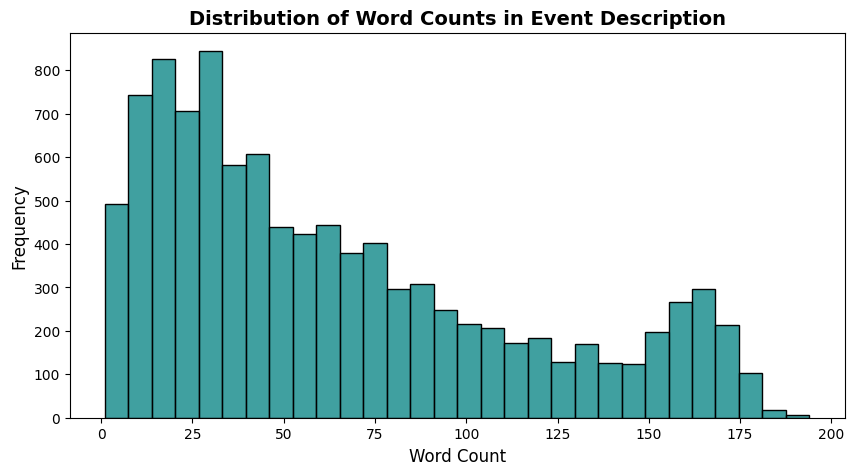

-> Số lượng từ trung bình: 64.6 words
-> Số lượng từ tối đa: 194 words


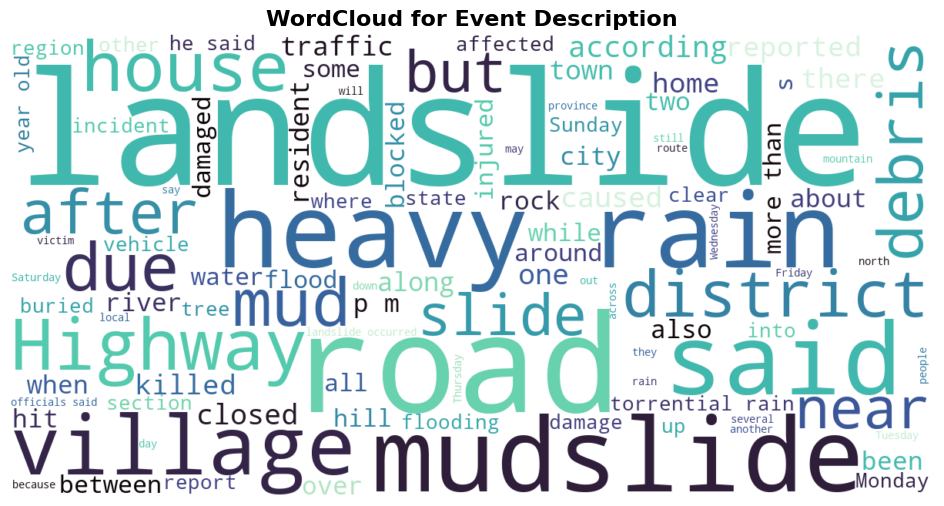

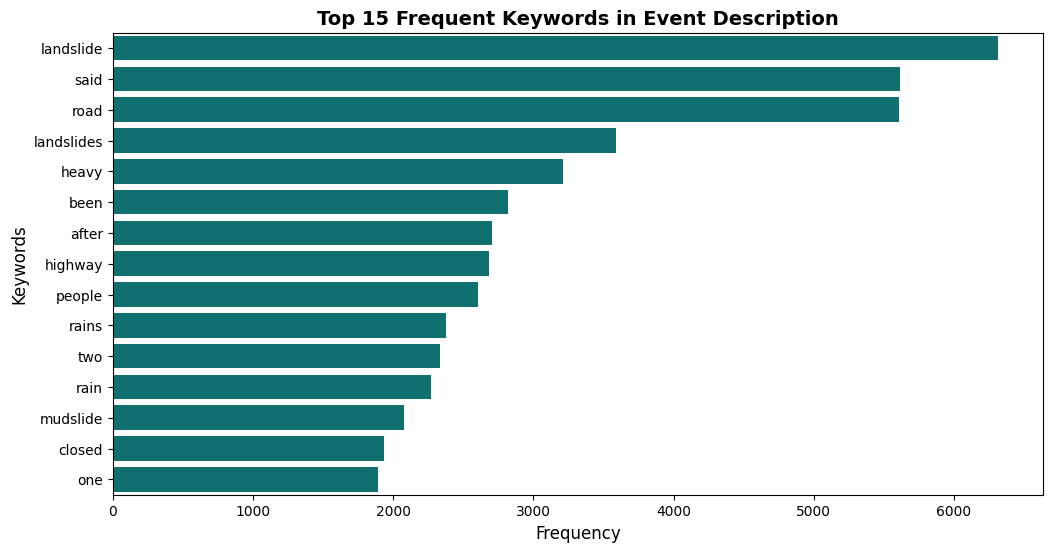


==================== KHÁM PHÁ CỘT: location_description ====================
-> Số lượng dòng có dữ liệu để phân tích: 10931


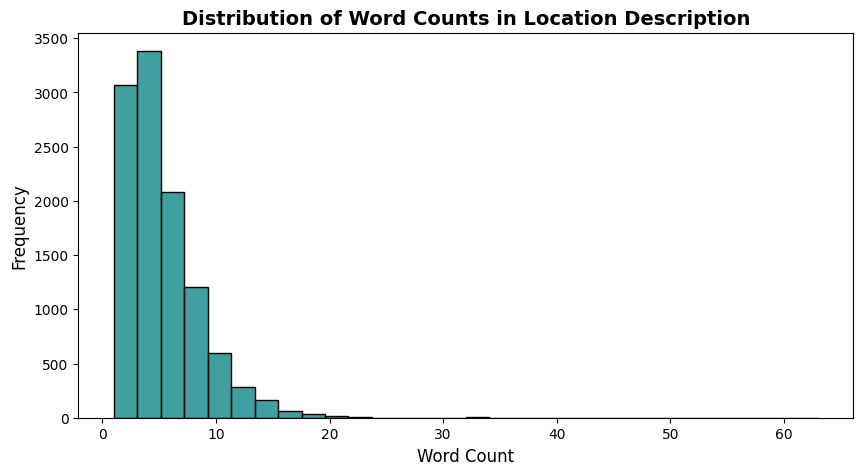

-> Số lượng từ trung bình: 5.5 words
-> Số lượng từ tối đa: 63 words


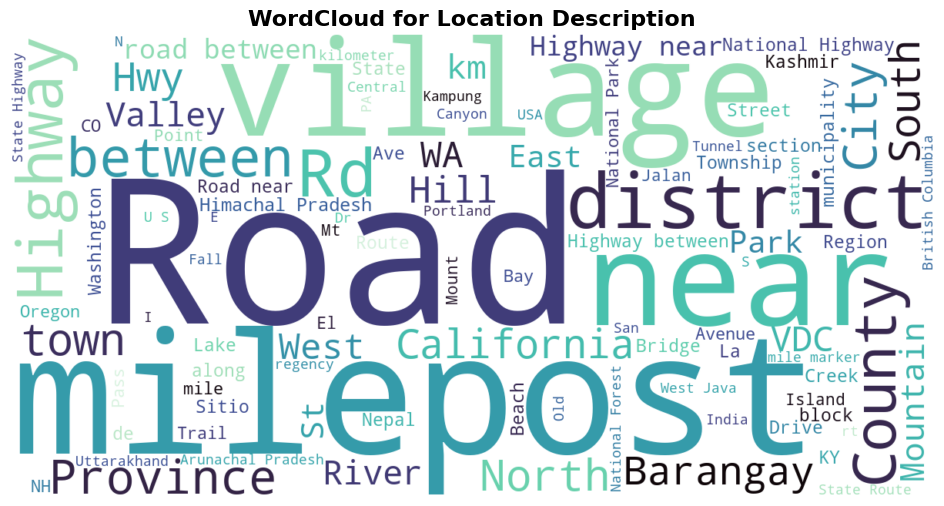

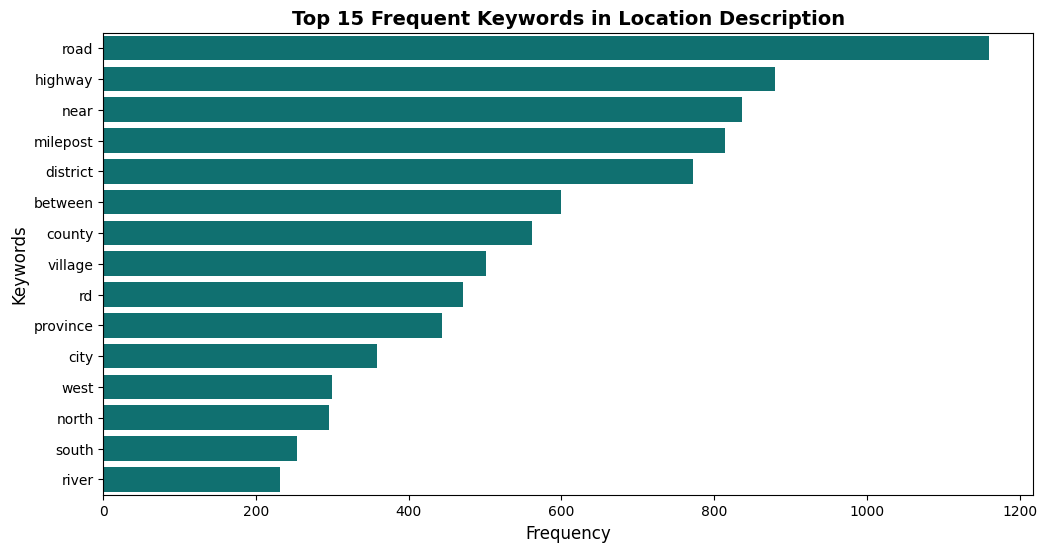

In [ ]:
# Danh sách các từ vô nghĩa (stop words) cần loại bỏ
stop_words = set([
    
    'the', 'and', 'of', 'in', 'to', 'a', 'was', 'were', 'at', 'on', 'for', 
    'by', 'with', 'from', 'that', 'which', 'is', 'as', 'it', 'an', 'area', 'part',
    'this', 'have', 'has', 'had', 'be', 'are', 'us', 'or', 'ca'
])

# Hàm khám phá
def explore_text_column(df, col_name, title_name):
    """
    Hàm thực hiện 3 bước khám phá cho một cột văn bản:
    1. Biểu đồ phân bố độ dài từ.
    2. WordCloud.
    3. Biểu đồ Top 15 từ khóa phổ biến nhất.
    """
    
    print(f"\n{'='*20} KHÁM PHÁ CỘT: {col_name} {'='*20}")
    
    # Chỉ lấy cột cần thiết và loại bỏ dòng thiếu
    df_text = df[[col_name]].dropna()
    print(f"-> Số lượng dòng có dữ liệu để phân tích: {len(df_text)}")
    
    if len(df_text) == 0:
        print("-> Không có dữ liệu nào để phân tích.")
        return

    # Phân tích độ dài văn bản (Số lượng từ)
    df_text['word_count'] = df_text[col_name].apply(lambda x: len(str(x).split()))
    
    # Vẽ biểu đồ Histogram độ dài
    plt.figure(figsize=(10, 5))
    sns.histplot(df_text['word_count'], bins=30, color='teal')
    plt.title(f'Distribution of Word Counts in {title_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Word Count', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()
    
    print(f"-> Số lượng từ trung bình: {df_text['word_count'].mean():.1f} words")
    print(f"-> Số lượng từ tối đa: {df_text['word_count'].max()} words")

    # STEP 3: WordCloud Generation
    # Kết hợp tất cả văn bản thành một chuỗi duy nhất
    text_combined = " ".join(str(desc) for desc in df_text[col_name])
    
    wordcloud = WordCloud(
        width=1200, height=600, 
        background_color='white', 
        colormap='mako',
        stopwords=stop_words,
        max_words=100
    ).generate(text_combined)

    # Plot: WordCloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {title_name}', fontsize=16, fontweight='bold')
    plt.show()

    # Vẽ biểu đồ Top 15 từ khóa (Bar Chart)
    # Tách từ, chuyển về chữ thường, lọc bỏ stop_words và ký tự lạ
    words = text_combined.lower().split()
    filtered_words = []
    for w in words:
        w_clean = w.strip('.,;:"()').lower()
        if w_clean.isalpha() and w_clean not in stop_words:
            filtered_words.append(w_clean)

    
    # Đếm tần suất
    word_counts = Counter(filtered_words)
    common_words = word_counts.most_common(15)
    
    if common_words:
        words_x, counts_y = zip(*common_words)
        
        plt.figure(figsize=(12, 6))
        # Note: 'color' argument in seaborn accepts single color names like 'teal'
        sns.barplot(x=list(counts_y), y=list(words_x), color='teal') 
        plt.title(f'Top 15 Frequent Keywords in {title_name}', fontsize=14, fontweight='bold')
        plt.xlabel('Frequency', fontsize=12)
        plt.ylabel('Keywords', fontsize=12)
        plt.show()
    else:
        print("-> Không đủ từ để vẽ biểu đồ tần suất.")

# --- CHẠY HÀM CHO TỪNG CỘT ---

# 1. Khám phá cột 'event_description'
explore_text_column(df, 'event_description', 'Event Description')

# 2. Khám phá cột 'location_description'
explore_text_column(df, 'location_description', 'Location Description')

**Nhận xét:**
- Cột `event_description`: có độ dài phân bố lệch phải, với một số mô tả rất dài. Các từ phổ biến là landslide, road.
- Cột `location_description`: có độ dài phân bố lệch phải. Các từ phổ biến là road, highway, milepost, village.

## Phân tích dữ liệu bị thiếu

### Đánh giá tổng quan

In [ ]:
df_cols = pd.DataFrame({
    'Count Missing': df.isna().sum(),
    'Percent Missing': df.isnull().sum() * 100 / df.shape[0]
})

df_cols = df_cols.sort_values(by='Percent Missing', ascending=False)

print("Bảng tóm tắt giá trị thiếu")
df_cols

Bảng tóm tắt giá trị thiếu


,Count Missing,Percent Missing
injury_count,5674,51.43
admin_division_name,1637,14.84
gazeteer_closest_point,1563,14.17
country_name,1562,14.16
gazeteer_distance,1562,14.16
admin_division_population,1562,14.16
fatality_count,1385,12.55
event_description,862,7.81
location_description,102,0.92
landslide_setting,69,0.63


Biểu đồ trực quan hóa các mẫu dữ liệu bị thiếu


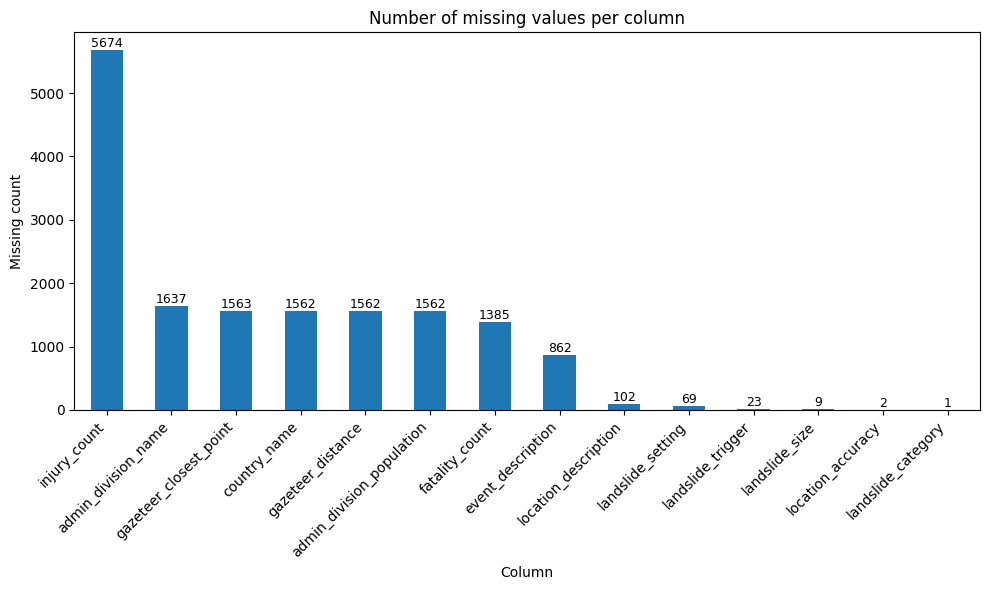

In [ ]:
missing_cnt = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)

# Bar chart: số missing
plt.figure(figsize=(10,6))
ax = missing_cnt[missing_cnt > 0].plot(kind='bar')
plt.title('Number of missing values per column')
plt.ylabel('Missing count')
plt.xlabel('Column')
plt.xticks(rotation=45, ha='right')

# optional: annotate counts trên bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
print("Biểu đồ trực quan hóa các mẫu dữ liệu bị thiếu")
plt.show()

**Các giá trị thiếu là ngẫu nhiên hay có quy luật? Có hàng hoặc nhóm cụ thể nào có nhiều giá trị thiếu hơn không?**

- Các giá trị thiếu trong bộ dữ liệu này không phải là ngẫu nhiên. Trong thu thập dữ liệu thiên tai, người nhập liệu thường có xu hướng để trống các ô thương vong nếu không có ai bị thương hoặc chết, thay vì điền số 0.
- Cột injury_count (số người bị thương) là cột thiếu dữ liệu nhiều nhất, lên tới 51.43%. Các cột còn lại đều thiếu dưới 15%, tương đối ít.

### Chiến lược cho từng cột

**Đối với mỗi cột có giá trị thiếu:**
1. Nhóm dữ liệu thiệt hại con người `injury_count, fatality_count`:
- Các giá trị có thể bị thiếu vì người ghi nhận thường để trống thay vì điền số 0 khi không có thương vong. 
- Kế hoạch xử lý: Điền khuyết bằng 0.
2. Nhóm dữ liệu Địa lý/Hành chính `country_name, admin_division_name, admin_division_population, gazeteer_distance, gazeteer_closest_point`:
- Các giá trị có thể bị thiếu vì hệ thống có tọa độ nhưng không tìm thấy tên quốc gia/tỉnh thành tương ứng trong cơ sở dữ liệu.
- Kế hoạch xử lý: Điền khuyết bằng "unknown" hoặc "other" đối với biến có kiểu dữ liệu object, điền khuyết bằng 0 đối với biến số.
3. Nhóm dữ liệu phân loại `landslide_trigger, landslide_setting, landslide_accuracy, landslide_category, landslide_size`:
- Các giá trị có thể bị thiếu vì người quan sát không xác định được tại thời điểm đó.
- Kế hoạch xử lý: Điền khuyết bằng "unknown" hoặc "other".
4. Nhóm mô tả văn bản `event_description, location_description`:
- Các giá trị có thể bị thiếu vì người nhập liệu không viết mô tả chi tiết hoặc không có thông tin bổ sung.
- Kế hoạch xử lý: Điền bằng chuỗi rỗng "" hoặc "No description".